<a href="https://colab.research.google.com/github/KalpanaMehta/KalpanaMehta/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


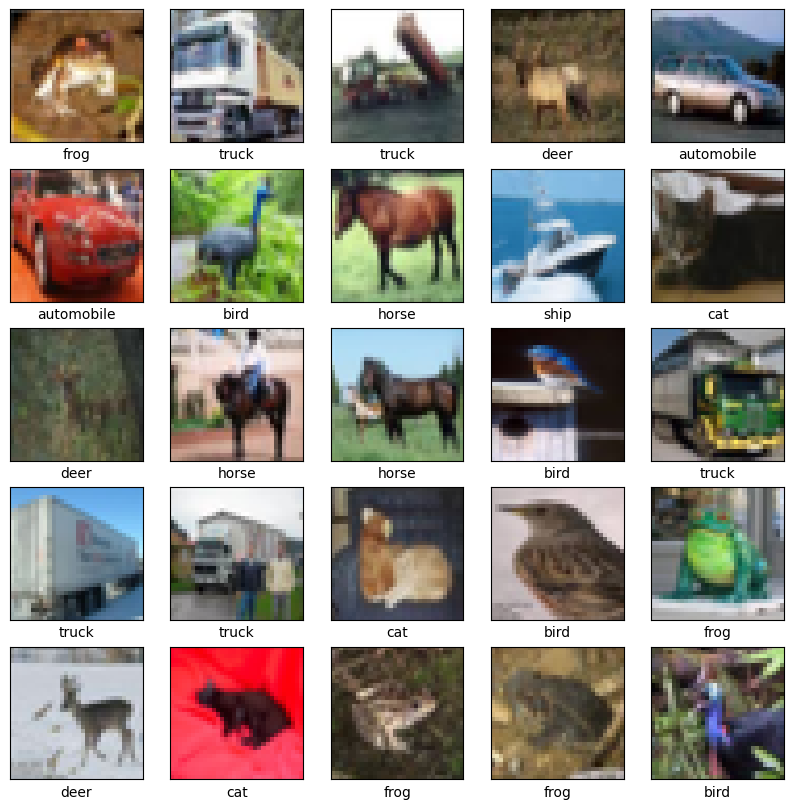

In [3]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [4]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
# Print the output of the first convolutional layer
print("Output after Convolutional Layer 1:")
print(model.layers[0].output)

Output after Convolutional Layer 1:
KerasTensor(type_spec=TensorSpec(shape=(None, 30, 30, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [6]:
# Print the output of the first convolutional layer
print("Output after Convolutional Layer 1:")
print(model.layers[2].output)

Output after Convolutional Layer 1:
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.3932 - accuracy: 0.4966
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1174 - accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9821 - accuracy: 0.6566
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8951 - accuracy: 0.6876
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8277 - accuracy: 0.7100
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7776 - accuracy: 0.7285
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7276 - accuracy: 0.7435
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6845 - accuracy: 0.7587
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6469 - accuracy: 0.7717
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [13]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - loss: 1.6406 - accuracy: 0.3898 - 4s/epoch - 13ms/step
Test accuracy: 0.3898000121116638


KeyError: ignored

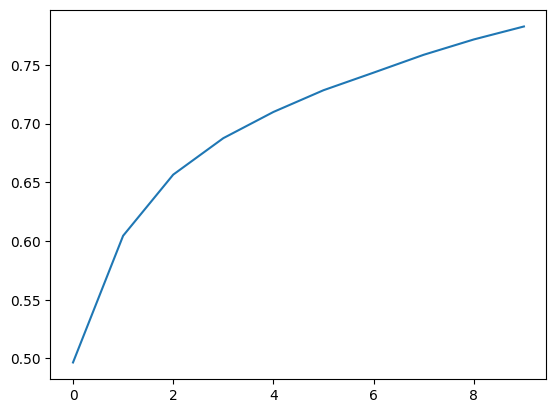

In [16]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


313/313 [==============================] - 6s 19ms/step


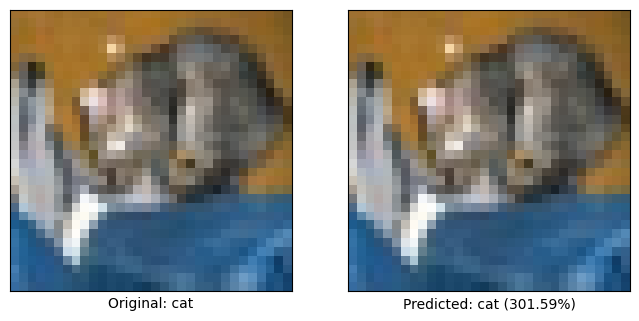

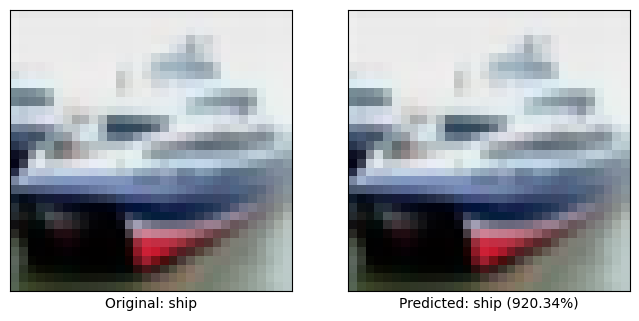

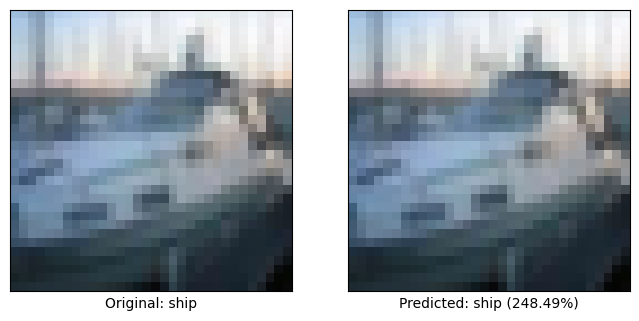

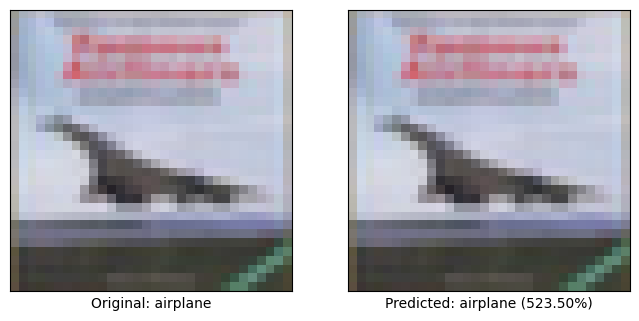

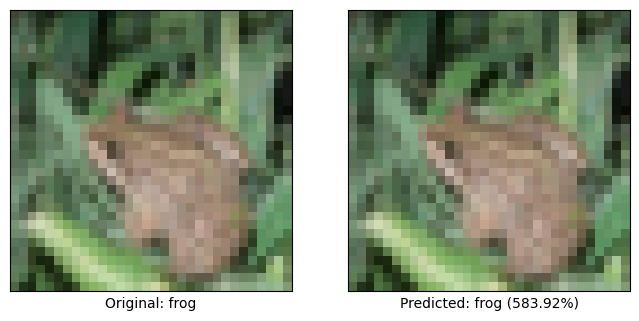

In [17]:
# Make predictions on the test data
predictions = model.predict(test_images)

# Show original and predicted results for a few test images
num_images_to_display = 5

for i in range(num_images_to_display):
    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Original: {class_names[test_labels[i][0]]}')

    # Display the predicted result
    predicted_label = class_names[np.argmax(predictions[i])]
    confidence = 100 * np.max(predictions[i])
    plt.subplot(1, 2, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_label} ({confidence:.2f}%)')

    plt.show()